# T  Generating Text from Irish Lyrics

In [45]:
#import paskages 
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam

### Building the Word Vocabulary

In [5]:
#Load data
data = open('data/Laurences_generated_poetry.txt').read()
corpus = data.lower().split("\n")


initialize the Tokenizer class and generate the word index dictionary:

In [22]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

In [23]:
#Define the total words.
total_words = len(tokenizer.word_index)+1
total_words

2690

In [24]:
print(f'total words: {total_words}')

total words: 2690


In [26]:
print(f'word index dictionary: {tokenizer.word_index}')

word index dictionary: {'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'thro

### Preprocessing the Dataset

In [27]:
input_sequences = []


In [18]:
input_sequences

[[51, 12],
 [51, 12, 96],
 [51, 12, 96, 1217],
 [51, 12, 96, 1217, 48],
 [51, 12, 96, 1217, 48, 2],
 [51, 12, 96, 1217, 48, 2, 69],
 [2, 11],
 [2, 11, 15],
 [2, 11, 15, 31],
 [2, 11, 15, 31, 361],
 [2, 11, 15, 31, 361, 8],
 [2, 11, 15, 31, 361, 8, 24],
 [2, 11, 15, 31, 361, 8, 24, 1218],
 [272, 798],
 [272, 798, 2],
 [272, 798, 2, 204],
 [272, 798, 2, 204, 24],
 [272, 798, 2, 204, 24, 579],
 [272, 798, 2, 204, 24, 579, 69],
 [118, 35],
 [118, 35, 119],
 [118, 35, 119, 799],
 [118, 35, 119, 799, 56],
 [118, 35, 119, 799, 56, 24],
 [118, 35, 119, 799, 56, 24, 184],
 [10, 184],
 [10, 184, 25],
 [10, 184, 25, 23],
 [10, 184, 25, 23, 5],
 [10, 184, 25, 23, 5, 580],
 [10, 184, 25, 23, 5, 580, 456],
 [2, 184],
 [2, 184, 800],
 [2, 184, 800, 12],
 [2, 184, 800, 12, 801],
 [2, 184, 800, 12, 801, 4],
 [2, 184, 800, 12, 801, 4, 7],
 [2, 184, 800, 12, 801, 4, 7, 235],
 [1219, 17],
 [1219, 17, 12],
 [1219, 17, 12, 75],
 [1219, 17, 12, 75, 1220],
 [1219, 17, 12, 75, 1220, 236],
 [1219, 17, 12, 75, 1

In [28]:
max_sequence_len =max([len(x) for x in input_sequences])
max_sequence_len 

16

In [29]:
input_sequences = pad_sequences(input_sequences , maxlen=max_sequence_len, padding='pre')


In [30]:
xs=input_sequences[:,:-1]
ys=tf.keras.utils.to_categorical(input_sequences[:,-1] , num_classes=total_words)

In [31]:
ys

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

print some of the examples as a sanity check.

In [33]:
# Get sample sentence
sentence = corpus[0].split()

token_list = []

for word in sentence:
    token_list.append(tokenizer.word_index[word])
    
print(sentence)
print(token_list)


['come', 'all', 'ye', 'maidens', 'young', 'and', 'fair']
[51, 12, 96, 1217, 48, 2, 69]


In [36]:
# Pick element
elem_number = 5
print(xs[elem_number])
print(tokenizer.sequences_to_texts([xs[elem_number]]))

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
['come all ye maidens young and']


In [38]:
print(np.argmax(ys[elem_number]))

69


### Build and compile the Model

In [39]:
# Hyperparameters
embedding_dim = 100
lstm_units = 150
learning_rate = 0.01

In [41]:
model = tf.keras.Sequential([
    Embedding(total_words , embedding_dim , input_length=max_sequence_len-1),
    Bidirectional(LSTM(lstm_units)),
    Dense(total_words , activation='softmax')
])

In [42]:
model.compile(loss='categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

In [43]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 15, 100)           269000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 300)               301200    
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 2690)              809690    
                                                                 
Total params: 1379890 (5.26 MB)
Trainable params: 1379890 (5.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Train the model

In [44]:
# Train the model
history = model.fit(xs, ys, epochs=100)

Epoch 1/100
377/377 [==============================] - 18s 36ms/step - loss: 6.7500 - accuracy: 0.0640
Epoch 2/100
377/377 [==============================] - 17s 45ms/step - loss: 6.2376 - accuracy: 0.0764
Epoch 3/100
377/377 [==============================] - 17s 46ms/step - loss: 5.9661 - accuracy: 0.0844
Epoch 4/100
377/377 [==============================] - 18s 47ms/step - loss: 5.6828 - accuracy: 0.0974
Epoch 5/100
377/377 [==============================] - 17s 44ms/step - loss: 5.3616 - accuracy: 0.1178
Epoch 6/100
377/377 [==============================] - 17s 44ms/step - loss: 5.0158 - accuracy: 0.1356
Epoch 7/100
377/377 [==============================] - 16s 43ms/step - loss: 4.6640 - accuracy: 0.1538
Epoch 8/100
377/377 [==============================] - 16s 44ms/step - loss: 4.3124 - accuracy: 0.1794
Epoch 9/100
377/377 [==============================] - 16s 43ms/step - loss: 3.9693 - accuracy: 0.2152
Epoch 10/100
377/377 [==============================] - 17s 44ms/step - l

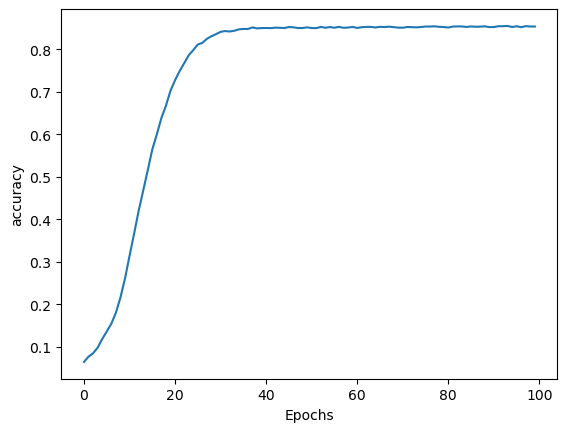

In [51]:
# Plot utility
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

### Generating Text

In [47]:
seed_text = "help me obi-wan kinobi youre my only hope"


In [49]:
next_words = 100

In [52]:

# Loop until desired length is reached
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list=pad_sequences([token_list] ,maxlen=max_sequence_len-1 , padding='pre')
    prob=model.predict(token_list , verbose=1)
    pred= np.argmax(prob , axis=-1)[0]
    if pred != 0:
        output_word = tokenizer.index_word[pred]
        
        seed_text += " " + output_word
print(seed_text)
    

1/1 [==============================] - 0s 22ms/step
help me obi-wan kinobi youre my only hope oer his more more bravely died down his neck his more heart he died and they more keep them now immortal take times she say say when by day again road to old rosin mooncoin night and late i was thinking with a poor name so ill sat him the thorn tree of shoes the ground rocky came of shoes on his lip over your ground round we more more generation ones down to your eyes more strength would so mild him by fray more more more immortal heart said she have stand him i was in fray ill guard
